<a id='top'></a>
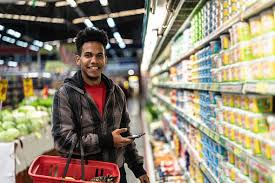

# Customer Supermarket Case Study

**Sorrenti Marco, Simone Baccile, Lorenzo Simone**

**Università di Pisa**

# Classification Task

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

In [68]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

## Data preparation for the classification

- Add new features:
 - Icheap: #items classified as cheap.
 - Iavg: #items classified as average.
 - Iexp: #items classified as expensive.
- Compute CustomerType.
- Discretize all categorical data (Country in our case).
- Remove useless columns.
- Set numerical value for label to predict (CustomerType).
 - low-spending: 0
 - medium-spending: 1
 - high-spending: 2
- Pop label to predict.

In [69]:
df = pd.read_csv("data/customer_behaviour.csv", sep = '\t', decimal=',')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5567 non-null   object 
 1   Country     5567 non-null   object 
 2   I           5567 non-null   int64  
 3   Iu          5567 non-null   int64  
 4   Imax        5567 non-null   int64  
 5   E1          5567 non-null   float64
 6   E2          5567 non-null   float64
 7   TotalCost   5567 non-null   float64
 8   Mep         5567 non-null   float64
 9   Lep         5567 non-null   float64
 10  AvgUP       5567 non-null   float64
 11  TotCart     5567 non-null   int64  
 12  AvgCart     5567 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 565.5+ KB


In [71]:
df1 = pd.read_csv("data/clean_df.csv", sep = '\t', decimal=',')

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459612 entries, 0 to 459611
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CartID              459612 non-null  int64  
 1   CartDate            459612 non-null  object 
 2   UnitPrice           459612 non-null  float64
 3   CustomerID          459612 non-null  object 
 4   CustomerCountry     459612 non-null  object 
 5   ProductID           459612 non-null  object 
 6   ProductDescription  459612 non-null  object 
 7   Quantity            459612 non-null  int64  
 8   CartYear            459612 non-null  int64  
 9   CartMonth           459612 non-null  int64  
 10  CartDay             459612 non-null  int64  
 11  CartHour            459612 non-null  float64
 12  Holiday             459612 non-null  bool   
 13  Sale                459612 non-null  float64
 14  TotalCartPrice      459612 non-null  float64
 15  TotalCartItems      459612 non-nul

Adding Icheap, Iavg and Iexp.

In [73]:
tmp = df1[df1['ProductType']=='cheap'].groupby(['CustomerID'])['Quantity'].sum().reset_index(name='sum')
df['Icheap'] = df.merge(tmp, how='left')['sum']
df['Icheap'] = df['Icheap'].fillna(0)
df['Icheap'] = df['Icheap'].astype(int)

In [74]:
tmp = df1[df1['ProductType']=='average'].groupby(['CustomerID'])['Quantity'].sum().reset_index(name='sum')
df['Iavg'] = df.merge(tmp, how='left')['sum']
df['Iavg'] = df['Iavg'].fillna(0)
df['Iavg'] = df['Iavg'].astype(int)

In [75]:
tmp = df1[df1['ProductType']=='expensive'].groupby(['CustomerID'])['Quantity'].sum().reset_index(name='sum')
df['Iexp'] = df.merge(tmp, how='left')['sum']
df['Iexp'] = df['Iexp'].fillna(0)
df['Iexp'] = df['Iexp'].astype(int)

Computing CustomerType.

(array([7.420e+02, 1.203e+03, 9.990e+02, 9.030e+02, 5.000e+02, 3.020e+02,
        2.170e+02, 1.650e+02, 8.700e+01, 7.800e+01, 5.800e+01, 4.400e+01,
        3.000e+01, 2.700e+01, 2.600e+01, 2.300e+01, 1.400e+01, 2.000e+01,
        1.400e+01, 9.000e+00, 1.600e+01, 3.000e+00, 6.000e+00, 1.100e+01,
        6.000e+00, 9.000e+00, 7.000e+00, 2.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
        3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
        4500., 4600.,

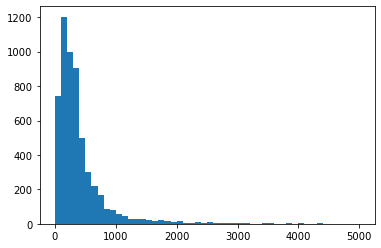

In [76]:
plt.hist(df['TotalCost']/df['TotCart'], bins=50, range=[0, 5000])

In [77]:
(df['TotalCost']/df['TotCart']).describe()

count     5567.000000
mean       416.399900
std        734.347974
min          0.390000
25%        157.535000
50%        281.016667
75%        460.446333
max      27051.910000
dtype: float64

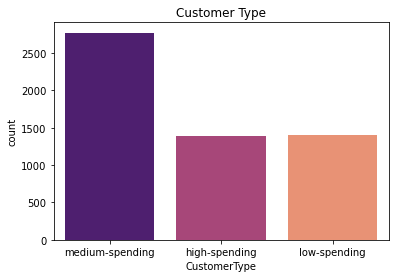

In [48]:
df['CustomerType'] = (df['TotalCost']/df['TotCart']).apply(lambda x: 'low-spending' if x<=158 else 'high-spending' if x>=460 else 'medium-spending')
sns.countplot(x = 'CustomerType', data = df, palette = 'magma')
plt.title('Customer Type')
#plt.savefig('Plot/customertype_count.png', bbox_inches = "tight")
plt.show()

Dropping useless columns for the classification.

In [80]:
df.drop(columns=['E1', 'E2', 'TotalCost', 'TotCart'], inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    5567 non-null   object 
 1   Country       5567 non-null   object 
 2   I             5567 non-null   int64  
 3   Iu            5567 non-null   int64  
 4   Imax          5567 non-null   int64  
 5   Mep           5567 non-null   float64
 6   Lep           5567 non-null   float64
 7   AvgUP         5567 non-null   float64
 8   AvgCart       5567 non-null   float64
 9   Icheap        5567 non-null   int64  
 10  Iavg          5567 non-null   int64  
 11  Iexp          5567 non-null   int64  
 12  CustomerType  5567 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 565.5+ KB


In [82]:
df['CustomerType'].describe()

count              5567
unique                3
top       high-spending
freq               1862
Name: CustomerType, dtype: object

In [83]:
#df.to_csv('data/customer_behaviour_class.csv', sep='\t', decimal=',', index=False)

List of useful function for the classification task:
- discretize_data: function used to discretize categorical data.
- class_report: function that print value of accuracy, precision, recall, f1-score for a prediction.
- cv_report: function that print useful metrics computing cross-validation.
- learn_curve_report: function that plot learning curve of a given estimator, its scalability and its performance.
- val_curve_report: function that plot the validation curve of an estimator for a given parameter.

In [84]:
#function to discretize the variables
#input: the dataset and the list of variables' names to discretize
def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

Discretize Country and CustomerType features.

In [85]:
#discretize categorical features
categ_col = ['Country']
df = discretize_data(df, categ_col)
df.drop(columns=categ_col, inplace=True)
df.drop(columns='CustomerID', inplace=True)

In [86]:
df['CustomerType'] = df['CustomerType'].apply(lambda x: 0 if x=='low-spending' else 2 if x=='high-spending' else 1)
df['CustomerType'] = df['CustomerType'].astype(int)

In [87]:
y = df.pop('CustomerType')

In [88]:
# Print classification report after a prediction.
# Input: label to test and label predicted.
def class_report(test_label, test_pred):
    print(metrics.classification_report(test_label, test_pred, target_names=['low-spending', 'medium-spending', 'high-spending']))

In [89]:
# Do the Cross-Validation and print its results.
# Input: estimator, data for the training, label to predict, number of splitting for cross-validation.
def cv_report(estimator, data, label, cv):
    scores = cross_validate(estimator, data, label, cv=cv, return_train_score= True)
    print('Fit time ', statistics.mean(scores['fit_time']))
    print('Score time ', statistics.mean(scores['score_time']))
    print('Test score ', statistics.mean(scores['test_score']))
    print('Train score ', statistics.mean(scores['train_score']))

In [90]:
# Plot the learning curve of an estimator, its scalabality and its performance.
# Input: estimator, data for the training, label to predict, number of splitting for cross-validation, name of estimator.
def learn_curve_report(estimator, data, label, cv, est_name=""):
    # scores[0]=train_size, scores[1]=train_scores, scores[2]=test_scores, scores[3]=fit_times
    scores = learning_curve(estimator, data, label, cv=cv, return_times=True)
    _, ax = plt.subplots(1, 3, figsize=(20, 5))
    
    ax[0].grid()
    ax[0].set_title("Learning curve of "+est_name)
    ax[0].plot(scores[0], np.mean(scores[1], axis=1), 'o-', color="r", label="Training score")
    ax[0].plot(scores[0], np.mean(scores[2], axis=1), 'o-', color="g", label="Cross-Validation score")
    ax[0].set(xlabel='Training examples', ylabel='Score')
    ax[0].legend()
    
    ax[1].grid()
    ax[1].set_title("Scalability of "+est_name)
    ax[1].plot(scores[0], np.mean(scores[3], axis=1), 'o-')
    ax[1].set(xlabel='Training examples', ylabel='Fit times')
    
    ax[2].grid()
    ax[2].set_title("Performance of "+est_name)
    ax[2].plot(np.mean(scores[3], axis=1), np.mean(scores[2], axis=1), 'o-')
    ax[2].set(xlabel='Fit times', ylabel='Score')
    return plt

In [91]:
# Plot the validation curve for an estimator and a given parameter.
# Input: estimator, data for the training, label to predict, name of parameter, range of parameter values, name of estimator, axes for plot.
def val_curve_report(estimator, data, label, param_name, param_range, est_name, ax=None):
    #scores[0]=train_scores, scores[1]=test_scores
    scores = validation_curve(estimator, data, y, param_name=param_name, param_range=param_range, scoring="accuracy")
    if ax is None:
        ax = plt.gca()
    ax.set_title("Validation Curve of "+est_name+" by parameter "+param_name)
    ax.set(xlabel=param_name, ylabel="Score")
    ax.plot(param_range, np.mean(scores[0], axis=1), label="Training score", color="darkorange")
    ax.plot(param_range, np.mean(scores[1], axis=1), label="Cross-validation score", color="navy")
    ax.legend()
    return ax

## Classification

In [26]:
train_set, test_set, train_label, test_label = train_test_split(df, y, stratify = y, test_size=0.3)

### Decision Tree

In [26]:
attributes = [col for col in df.columns if (col != 'CustomerType')]

In [27]:
dt = DecisionTreeClassifier(criterion='gini')
dt = dt.fit(train_set,train_label)
#y_pred = dt.predict(test_set)

In [28]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(dt, param_distributions=param_list, 
                                   n_iter=100)
random_search.fit(train_set, train_label)
dt = random_search.best_estimator_
dt

DecisionTreeClassifier(max_depth=13)

In [29]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

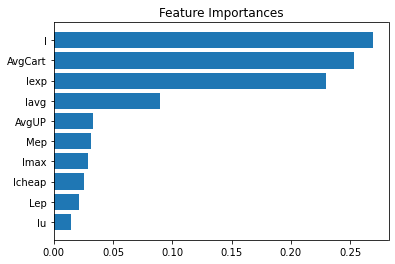

In [30]:
feature_names=attributes
nbr_features = 10
tree_feature_importances = dt.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Feature Importances")
plt.show()

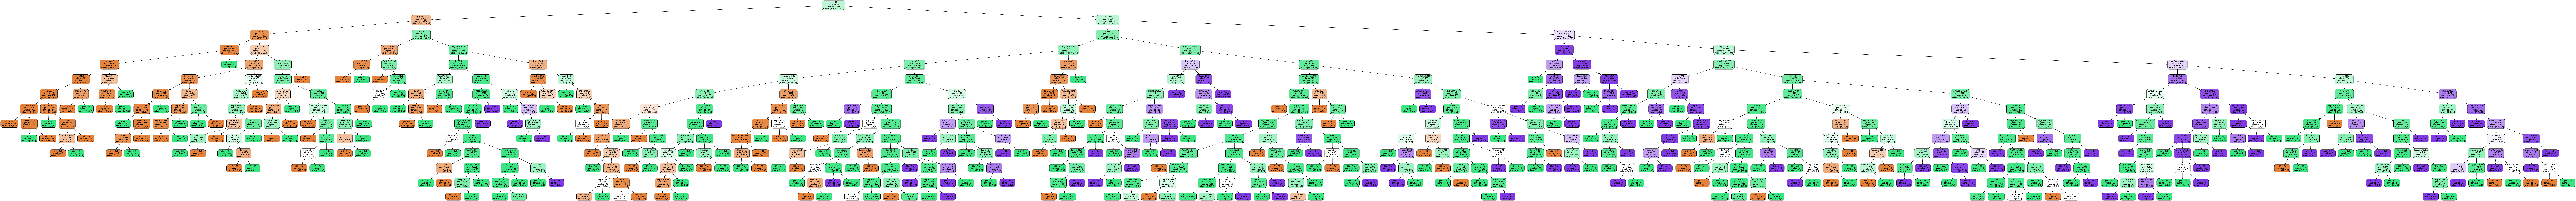

In [32]:
from sklearn import tree
import pydotplus
from IPython.display import Image

output = 'decision_tree.png'
dot_data = tree.export_graphviz(dt, out_file=None,  feature_names=attributes, filled=True, rounded=True,  special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png(output)
Image(graph.create_png())

In [33]:
class_report(test_label, test_pred_dt)

                 precision    recall  f1-score   support

   low-spending       0.84      0.81      0.82       420
medium-spending       0.80      0.84      0.82       832
  high-spending       0.82      0.77      0.80       419

       accuracy                           0.82      1671
      macro avg       0.82      0.81      0.81      1671
   weighted avg       0.82      0.82      0.82      1671



In [34]:
cv_report(dt, df, y, 5)

Fit time  0.04129395484924316
Score time  0.0029057025909423827
Test score  0.8356472632073052
Train score  0.9895367481809461


In [35]:
cm = metrics.confusion_matrix(test_label, test_pred_dt)
cm

array([[339,  80,   1],
       [ 62, 702,  68],
       [  1,  96, 322]])

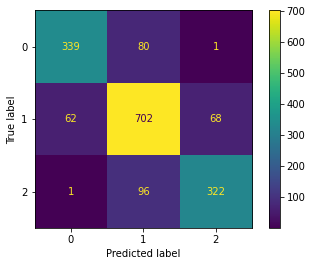

In [36]:
metrics.plot_confusion_matrix(dt, test_set, test_label)
plt.show() 

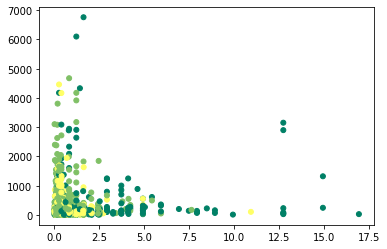

In [37]:
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_label.values, s=25, cmap='summer');

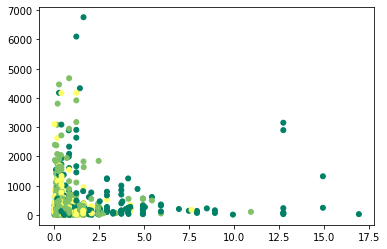

In [38]:
plt.scatter(test_set.iloc[:, 4].values, test_set.iloc[:, 2].values, c=test_pred_dt, s=25, cmap='summer');

### Adaboost

In [39]:
clf = AdaBoostClassifier(base_estimator=None)
clf.fit(train_set, train_label)

y_pred = clf.predict(test_set)
class_report(test_label, y_pred)

                 precision    recall  f1-score   support

   low-spending       0.96      0.71      0.82       420
medium-spending       0.76      0.96      0.85       832
  high-spending       0.95      0.68      0.80       419

       accuracy                           0.83      1671
      macro avg       0.89      0.79      0.82      1671
   weighted avg       0.86      0.83      0.83      1671



In [40]:
n_estimators = [100,150,200,300,500];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=20)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
adaboost_grid = GridSearchCV(AdaBoostClassifier(base_estimator= RandomForestClassifier(), ## the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
adaboost_grid.fit(train_set,train_label) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=20, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500]})

In [41]:
print (adaboost_grid.best_score_)
print (adaboost_grid.best_params_)
print (adaboost_grid.best_estimator_)

0.8715141146278871
{'learning_rate': 0.1, 'n_estimators': 300}
AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.1,
                   n_estimators=300)


In [42]:
adaBoost = adaboost_grid.best_estimator_
adaBoost.fit(train_set, train_label)
y_pred = adaBoost.predict(test_set)
class_report(test_label, y_pred)

                 precision    recall  f1-score   support

   low-spending       0.90      0.82      0.85       420
medium-spending       0.83      0.92      0.87       832
  high-spending       0.93      0.80      0.86       419

       accuracy                           0.86      1671
      macro avg       0.88      0.84      0.86      1671
   weighted avg       0.87      0.86      0.86      1671



In [43]:
cv_report(adaBoost, df, y, 5)

Fit time  0.9075089454650879
Score time  0.03217668533325195
Test score  0.8724722191305302
Train score  1.0


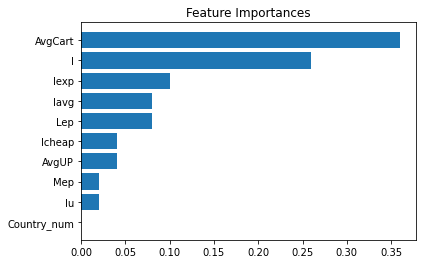

In [44]:
feature_names=attributes
nbr_features = 10
tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])

plt.title("Feature Importances")
plt.show()

### Gaussian Naive Bayes

In [25]:
gnb = GaussianNB()
gnb.fit(train_set, train_label)
test_pred_gnb = gnb.predict(test_set)
class_report(test_label, test_pred_gnb)

                 precision    recall  f1-score   support

   low-spending       0.40      0.94      0.57       420
medium-spending       0.54      0.35      0.42       832
  high-spending       0.59      0.22      0.32       419

       accuracy                           0.46      1671
      macro avg       0.51      0.50      0.44      1671
   weighted avg       0.52      0.46      0.43      1671



Cross validate Naive Bayes

In [26]:
cv_report(gnb, df, y, 5)

Fit time  0.006533050537109375
Score time  0.0033127307891845704
Test score  0.45603984895336813
Train score  0.46932904271535936


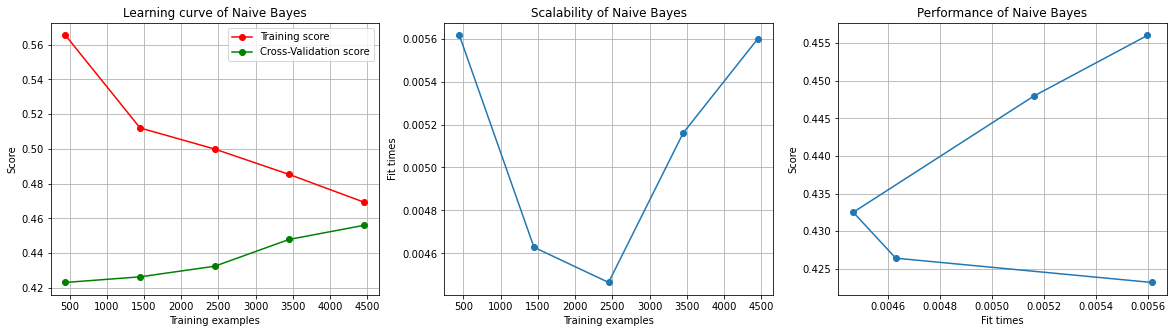

In [27]:
plt = learn_curve_report(gnb, df, y, 5, "Naive Bayes")
#plt.savefig('Plot/naive_bayes_curve.png', bbox_inches = "tight")
plt.show()

### Random Forest

In [28]:
rf = RandomForestClassifier(n_estimators=30, criterion='gini', max_features=3, max_depth=4, min_samples_split=2, min_samples_leaf=8, bootstrap=True, oob_score=True)
rf.fit(train_set, train_label)
test_pred_rf = rf.predict(test_set)
class_report(test_label, test_pred_rf)

                 precision    recall  f1-score   support

   low-spending       0.88      0.68      0.77       420
medium-spending       0.68      0.93      0.79       832
  high-spending       0.89      0.46      0.61       419

       accuracy                           0.75      1671
      macro avg       0.82      0.69      0.72      1671
   weighted avg       0.78      0.75      0.74      1671



Find the optimal number of estimator

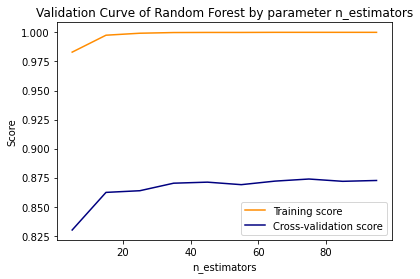

In [29]:
rf = RandomForestClassifier()
val_curve_report(rf, df, y, "n_estimators", range(5, 105, 10), "Random Forest")
plt.show()

We choosen as n_estimators 30

In [30]:
best_n_est = 30

Now we try to evaluate other parameters

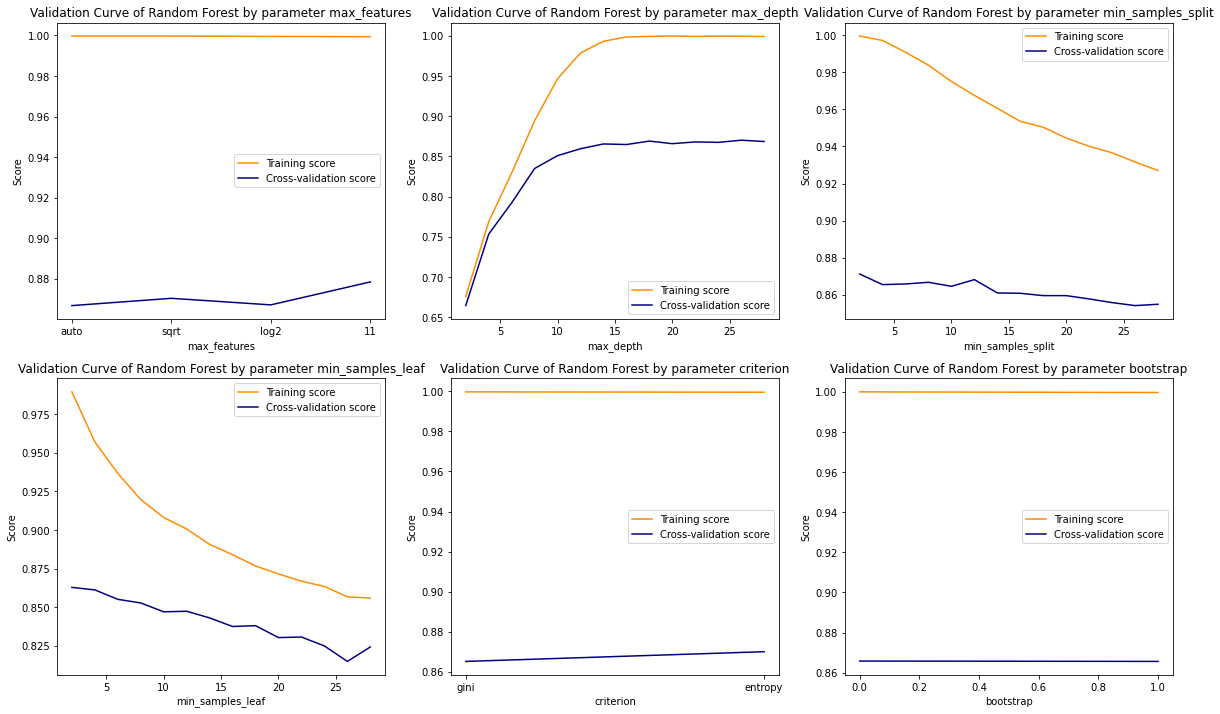

In [31]:
rf = RandomForestClassifier(n_estimators=best_n_est)
_, ax = plt.subplots(2, 3, figsize=(20, 12))
val_curve_report(rf, df, y, "max_features", ["auto", "sqrt", "log2", df.shape[1]], "Random Forest", ax[0,0])
val_curve_report(rf, df, y, "max_depth", range(2, 30, 2), "Random Forest", ax[0,1])
val_curve_report(rf, df, y, "min_samples_split", range(2, 30, 2), "Random Forest", ax[0,2])
val_curve_report(rf, df, y, "min_samples_leaf", range(2, 30, 2), "Random Forest", ax[1,0])
val_curve_report(rf, df, y, "criterion", ["gini", "entropy"], "Random Forest", ax[1,1])
val_curve_report(rf, df, y, "bootstrap", [True, False], "Random Forest", ax[1,2])
#plt.savefig('Plot/rf_parameters_curve.png', bbox_inches = "tight")
plt.show()

We decided to fix max_features to the total number of features, criterion to "gini" and bootstrap to True.

In [32]:
best_max_features = df.shape[1]
best_criterion = "gini"
best_bootstrap = True

Finding best value for max_depth, min_samples_split and min_samples_leaf using randomized search.

In [33]:
rf = RandomForestClassifier(n_estimators=best_n_est, criterion=best_criterion, max_features=best_max_features, bootstrap=best_bootstrap)
param_dist = {"max_depth": range(6, 20),
              "min_samples_split": range(8, 16),
              "min_samples_leaf": range(2, 14)}
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=30, cv=5)
grid_search.fit(df, y)
print('Best setting parameters ', grid_search.cv_results_['params'][0])

Best setting parameters  {'min_samples_split': 14, 'min_samples_leaf': 11, 'max_depth': 13}


In [34]:
best_min_sample_split = grid_search.cv_results_['params'][0]['min_samples_split']
best_min_sample_leaf = grid_search.cv_results_['params'][0]['min_samples_leaf']
best_max_depth = grid_search.cv_results_['params'][0]['max_depth']

Test Random Forest with best values.

In [35]:
rf = RandomForestClassifier(n_estimators=best_n_est, 
                            criterion=best_criterion, 
                            max_features=best_max_features, 
                            bootstrap=best_bootstrap,
                            max_depth=best_max_depth,
                            min_samples_split=best_min_sample_split,
                            min_samples_leaf=best_min_sample_leaf)

In [36]:
rf.fit(train_set, train_label)
test_pred_rf = rf.predict(test_set)
class_report(test_label, test_pred_rf)

                 precision    recall  f1-score   support

   low-spending       0.92      0.83      0.87       420
medium-spending       0.84      0.92      0.88       832
  high-spending       0.90      0.81      0.85       419

       accuracy                           0.87      1671
      macro avg       0.88      0.85      0.87      1671
   weighted avg       0.87      0.87      0.87      1671



In [37]:
cv_report(rf, df, y, 5)

Fit time  0.48737168312072754
Score time  0.009532356262207031
Test score  0.8660037003521303
Train score  0.9184480505919683


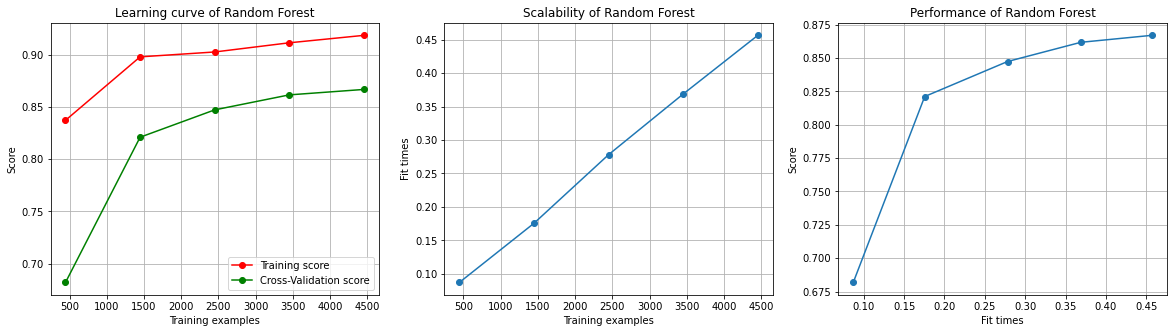

In [38]:
learn_curve_report(rf, df, y, 5, "Random Forest")
#plt.savefig('Plot/rf_curve.png', bbox_inches = "tight")

### KNeighbors Classifier

In [39]:
knn = KNeighborsClassifier()
knn.fit(train_set, train_label)
test_pred_knn = knn.predict(test_set)
class_report(test_label, test_pred_knn)

                 precision    recall  f1-score   support

   low-spending       0.73      0.70      0.72       420
medium-spending       0.66      0.75      0.70       832
  high-spending       0.64      0.49      0.55       419

       accuracy                           0.67      1671
      macro avg       0.68      0.65      0.66      1671
   weighted avg       0.67      0.67      0.67      1671



In [40]:
cv_report(knn, df, y, 5)

Fit time  0.009153604507446289
Score time  0.08327641487121581
Test score  0.6684124779616125
Train score  0.7756429851431369


Finding best value for KNeighbors parameters.

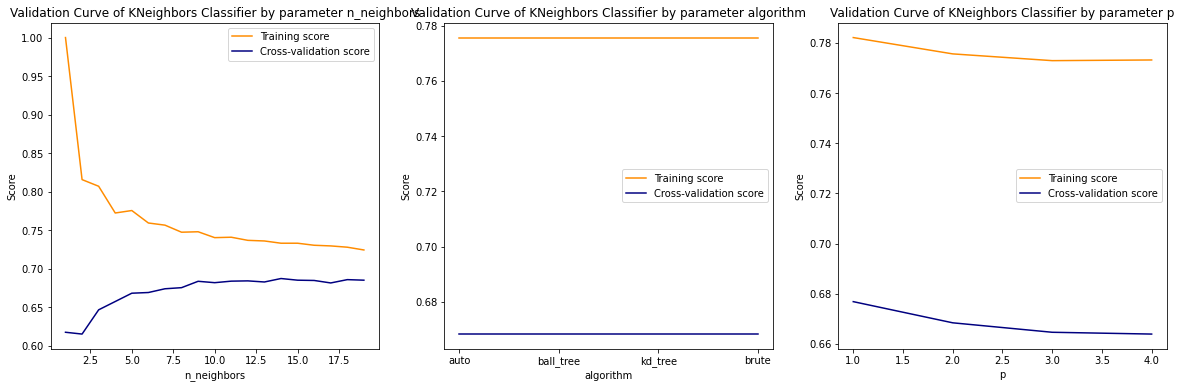

In [41]:
_, ax = plt.subplots(1, 3, figsize=(20, 6))
val_curve_report(knn, df, y, "n_neighbors", range(1, 20), "KNeighbors Classifier", ax[0])
val_curve_report(knn, df, y, "algorithm", ["auto", "ball_tree", "kd_tree", "brute"], "KNeighbors Classifier", ax[1])
val_curve_report(knn, df, y, "p", range(1, 5), "KNeighbors Classifier", ax[2])
plt.show()

We choosen 10 as n_neighbors and p=1 (Manhattan distance)

In [42]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(train_set, train_label)
test_pred_knn = knn.predict(test_set)
class_report(test_label, test_pred_knn)

                 precision    recall  f1-score   support

   low-spending       0.77      0.75      0.76       420
medium-spending       0.67      0.81      0.73       832
  high-spending       0.71      0.45      0.55       419

       accuracy                           0.70      1671
      macro avg       0.72      0.67      0.68      1671
   weighted avg       0.71      0.70      0.69      1671



In [43]:
cv_report(knn, df, y, 5)

Fit time  0.007252168655395508
Score time  0.08860492706298828
Test score  0.6883526012959298
Train score  0.7477554271117457


<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/datamining/lib/python3.8/site-packages/matplotlib/pyplot.py'>

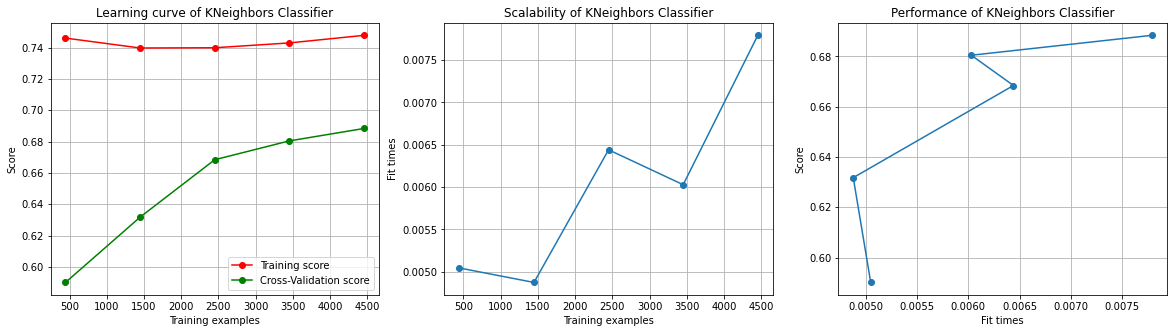

In [44]:
learn_curve_report(knn, df, y, 5, "KNeighbors Classifier")

### MLP

In [65]:
#Dataset loading
df = pd.read_csv("./data/customer_behaviour_class.csv", sep='\t', decimal=',')
df.drop(columns=['Country', 'CustomerID'], inplace=True)
df.info()
df = df.values


#Feature extraction
features = df[:,0:-1].astype(float)
output = df[:,-1]

#Categorical to 1-Hot-Encoding
encoder = LabelEncoder()
encoder.fit(output)
encoded_Y = encoder.transform(output)

#Hot Encoding
henc_output = np_utils.to_categorical(encoded_Y)

#Data splitting (SIMONE)
train_set, test_set, train_label, test_label = train_test_split(features, output, stratify = output, test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   I             5567 non-null   int64  
 1   Iu            5567 non-null   int64  
 2   Imax          5567 non-null   int64  
 3   Mep           5567 non-null   float64
 4   Lep           5567 non-null   float64
 5   AvgUP         5567 non-null   float64
 6   AvgCart       5567 non-null   float64
 7   Icheap        5567 non-null   int64  
 8   Iavg          5567 non-null   int64  
 9   Iexp          5567 non-null   int64  
 10  CustomerType  5567 non-null   object 
dtypes: float64(4), int64(6), object(1)
memory usage: 478.5+ KB


In [66]:
def mlp():
    model = Sequential()
    model.add(Dense(30, input_dim=10, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = mlp()

In [67]:
train_label_value = encoder.transform(train_label)
train_label_hot = np_utils.to_categorical(train_label_value)

#Hyperparameters 
history = model.fit(train_set ,train_label_hot, validation_split = 0.1, batch_size=4, epochs = 200)

test_pred_mlp = np.argmax(model.predict(test_set), axis=-1)
test_pred_mlp_value = encoder.inverse_transform(test_pred_mlp)

class_report(test_label, test_pred_mlp_value)

Epoch 1/200
877/877 [==============================] - 6s 5ms/step - loss: 31.5222 - accuracy: 0.4593 - val_loss: 2.2692 - val_accuracy: 0.5205
Epoch 2/200
877/877 [==============================] - 3s 4ms/step - loss: 6.0438 - accuracy: 0.5210 - val_loss: 3.8591 - val_accuracy: 0.6103
Epoch 3/200
877/877 [==============================] - 3s 3ms/step - loss: 7.6432 - accuracy: 0.5647 - val_loss: 6.0368 - val_accuracy: 0.4949
Epoch 4/200
877/877 [==============================] - 2s 2ms/step - loss: 3.0170 - accuracy: 0.5965 - val_loss: 1.4239 - val_accuracy: 0.6513
Epoch 5/200
877/877 [==============================] - 2s 3ms/step - loss: 3.0212 - accuracy: 0.6020 - val_loss: 1.7696 - val_accuracy: 0.6590
Epoch 6/200
877/877 [==============================] - 3s 3ms/step - loss: 3.1225 - accuracy: 0.6446 - val_loss: 2.1479 - val_accuracy: 0.6538
Epoch 7/200
877/877 [==============================] - 3s 3ms/step - loss: 4.2379 - accuracy: 0.6012 - val_loss: 2.4505 - val_accuracy: 0.633

Epoch 58/200
877/877 [==============================] - 1s 1ms/step - loss: 0.5621 - accuracy: 0.7434 - val_loss: 0.6852 - val_accuracy: 0.7026
Epoch 59/200
877/877 [==============================] - 1s 1ms/step - loss: 0.5759 - accuracy: 0.7424 - val_loss: 0.7245 - val_accuracy: 0.7205
Epoch 60/200
877/877 [==============================] - 1s 1ms/step - loss: 0.5850 - accuracy: 0.7326 - val_loss: 0.6475 - val_accuracy: 0.7077
Epoch 61/200
877/877 [==============================] - 1s 2ms/step - loss: 0.5912 - accuracy: 0.7283 - val_loss: 0.6309 - val_accuracy: 0.7000
Epoch 62/200
877/877 [==============================] - 2s 2ms/step - loss: 0.5807 - accuracy: 0.7335 - val_loss: 0.6725 - val_accuracy: 0.7051
Epoch 63/200
877/877 [==============================] - 1s 1ms/step - loss: 0.5845 - accuracy: 0.7359 - val_loss: 0.6063 - val_accuracy: 0.7308
Epoch 64/200
877/877 [==============================] - 1s 1ms/step - loss: 0.5429 - accuracy: 0.7569 - val_loss: 0.5794 - val_accuracy:

Epoch 115/200
877/877 [==============================] - 1s 1ms/step - loss: 0.3923 - accuracy: 0.8335 - val_loss: 0.4854 - val_accuracy: 0.7897
Epoch 116/200
877/877 [==============================] - 1s 1ms/step - loss: 0.4120 - accuracy: 0.8206 - val_loss: 0.3484 - val_accuracy: 0.8385
Epoch 117/200
877/877 [==============================] - 1s 1ms/step - loss: 0.4009 - accuracy: 0.8195 - val_loss: 0.4209 - val_accuracy: 0.8000
Epoch 118/200
877/877 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8228 - val_loss: 0.4919 - val_accuracy: 0.8487
Epoch 119/200
877/877 [==============================] - 1s 1ms/step - loss: 0.3967 - accuracy: 0.8378 - val_loss: 0.4144 - val_accuracy: 0.8154
Epoch 120/200
877/877 [==============================] - 1s 1ms/step - loss: 0.4133 - accuracy: 0.8158 - val_loss: 0.5743 - val_accuracy: 0.7385
Epoch 121/200
877/877 [==============================] - 1s 1ms/step - loss: 0.4005 - accuracy: 0.8147 - val_loss: 0.3953 - val_ac

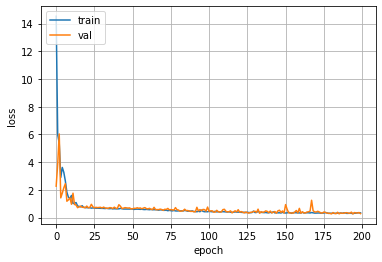

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

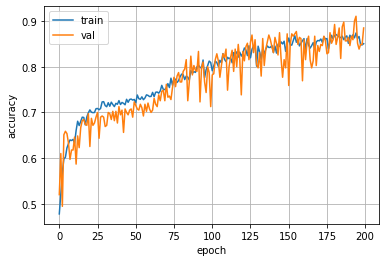

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()